<a href="https://colab.research.google.com/github/mathewchamberlain/MBA/blob/main/Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/mathewchamberlain/MBA/main/adult.csv', na_values = '?')
# Map to binary values
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [4]:
# try lazy predict
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
#Splitting the data into test data and training data
from sklearn.model_selection import train_test_split
X = df.drop(['income'], axis=1)
Y = df['income']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [27]:
# run lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)
models

100%|██████████| 29/29 [01:52<00:00,  3.86s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.87,0.79,0.79,0.86,0.53
AdaBoostClassifier,0.86,0.77,0.77,0.85,1.28
RandomForestClassifier,0.85,0.77,0.77,0.85,2.48
XGBClassifier,0.86,0.77,0.77,0.85,2.10
GaussianNB,0.69,0.77,0.77,0.71,0.12
PassiveAggressiveClassifier,0.84,0.76,0.76,0.83,0.14
ExtraTreesClassifier,0.84,0.76,0.76,0.83,2.46
BaggingClassifier,0.84,0.75,0.75,0.84,1.16
BernoulliNB,0.73,0.75,0.75,0.75,0.13


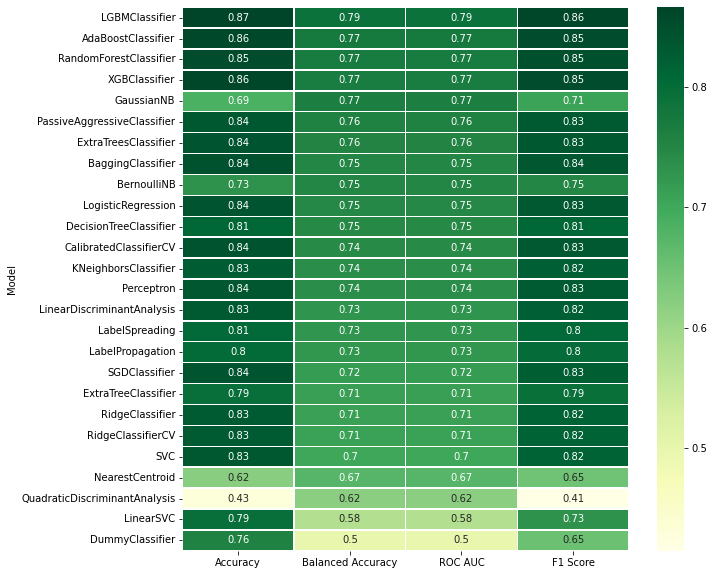

In [53]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(models.iloc[:, 0:4:], annot=True,  cmap="YlGn", linewidths=.5, ax=ax)

In [7]:
# run tpot
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=f9da6aa6b8acb899054da8c587b6aa195dcfc2b6b161282ddbbd57fa26e3e637
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [28]:
# one hot encode the categorical variables
q = df.drop(['income'], axis=1)
q = pd.get_dummies(q)

In [29]:
# split test and train again
X_tra, X_te, Y_tra, Y_te = train_test_split(q, Y, test_size = 0.3, random_state = 0)

In [33]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,random_state=42, verbosity=2)

pipeline_optimizer.fit(X_tra, Y_tra)

print(pipeline_optimizer.score(X_te, Y_te))

pipeline_optimizer.export('tpot_exported_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8638116639706347

Generation 2 - Current best internal CV score: 0.8638116639706347

Generation 3 - Current best internal CV score: 0.8703931131214062

Generation 4 - Current best internal CV score: 0.8703931131214062

Generation 5 - Current best internal CV score: 0.8703931131214062

Best pipeline: XGBClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=2, max_features=0.9500000000000001, min_samples_leaf=2, min_samples_split=6, n_estimators=100, subsample=0.9500000000000001), learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)
0.8650834271675709


In [ ]:
## this code is NOT run
## this is the ideal pipeline outputted by tpot
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.8703931131214062
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=0.9500000000000001, min_samples_leaf=2, min_samples_split=6, n_estimators=100, subsample=0.9500000000000001)),
    XGBClassifier(learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

# Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b3b3af430>,
      dtype=object)

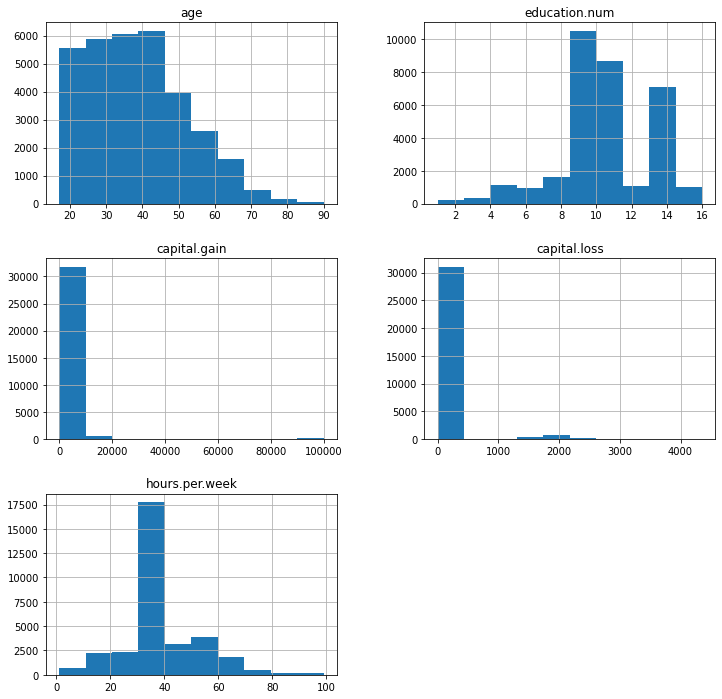

In [38]:
df[['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].hist()

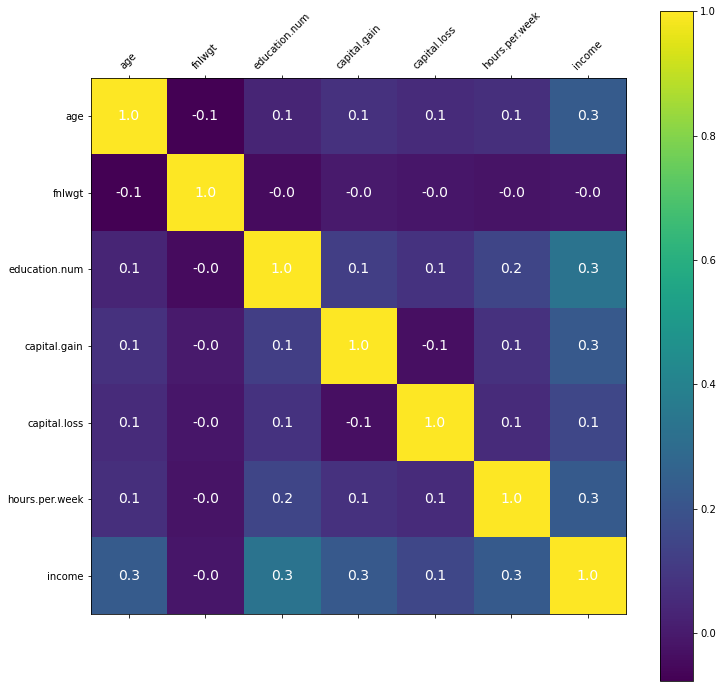

In [40]:
# Corplot
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr(method = 'spearman')):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [45]:
# run a classifier predicting income
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# load data
df = pd.read_csv('https://raw.githubusercontent.com/mathewchamberlain/MBA/main/adult.csv', na_values = '?')

# one hot encode the categorical variables
q = pd.get_dummies(df)

# split test and train
y = q['income_>50K']
q = q.drop('income_>50K', axis = 1)
q = q.drop('income_<=50K', axis = 1)
Xtrain, Xtest, ytrain, ytest = train_test_split(q, y,random_state=0)
wgt_train = Xtrain['fnlwgt']
wgt_test = Xtest['fnlwgt']
Xtrain = Xtrain.drop('fnlwgt', axis = 1)
Xtest = Xtest.drop('fnlwgt', axis = 1)
model = RandomForestClassifier()                       # 2. instantiate model
model.fit(Xtrain, ytrain, sample_weight = wgt_train)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data
accuracy_score(ytest, y_model)

0.8455963640830365

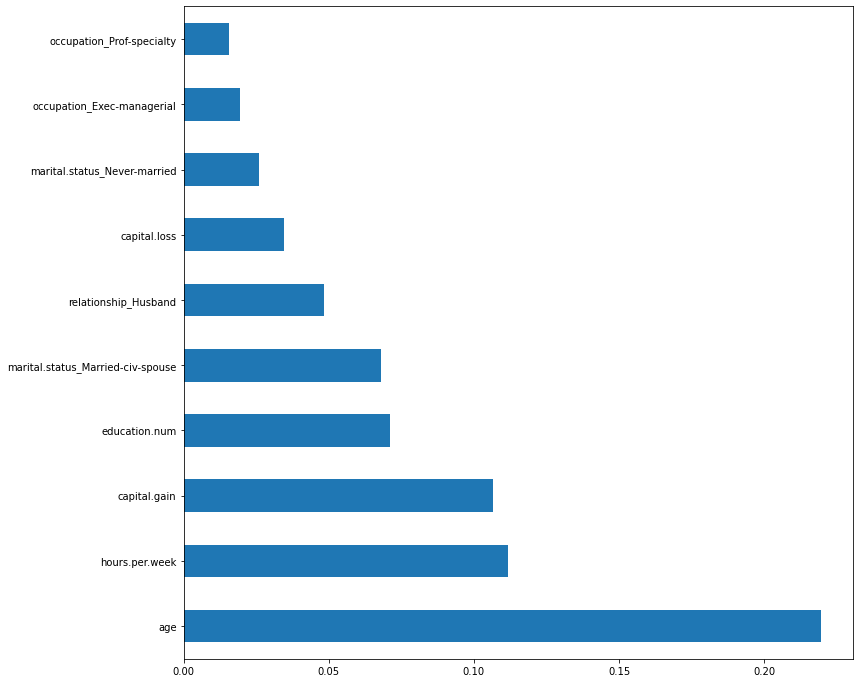

In [47]:
feat_importances = pd.Series(model.feature_importances_, index=Xtrain.columns)
feat_importances.nlargest(10).plot(kind='barh')